In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
mnist_data = pd.read_csv("/content/mnist.csv").values

In [ ]:
labels = mnist_data[:, 0]

print(labels[0])

digits = mnist_data[:, 1:]


img_size = 28
plt.imshow(digits[-1].reshape(img_size, img_size))
plt.show()

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# For image resizing
import cv2

In [31]:
X = digits
y = labels

def resize_images(images, original_size=(28, 28), new_size=(14, 14)):
    resized_images = np.empty((len(images), new_size[0] * new_size[1]))

    for i, image in enumerate(images):
        # Ensure the image is not empty
        if image.size == 0:
            raise ValueError(f"Empty image at index {i}")

        # Reshape the image to its original 2D shape
        reshaped_image = image.reshape(original_size).astype(np.uint8)

        # Resize the image
        resized = cv2.resize(reshaped_image, new_size, interpolation=cv2.INTER_AREA)

        # Flatten and store the resized image
        resized_images[i] = resized.flatten()

    return resized_images

# Test the function with a single image
X_resized = resize_images(X)

# Splitting the data: 5k for training and the rest for testing
# Stratify ensures we have similar distributions of labels on test and train data sets
X_train, X_test, y_train, y_test = train_test_split(X_resized, y, train_size=5000, stratify=y, random_state=42)

In [36]:
# Defining the Logistic Regression CV with L1 penalty
log_reg_cv = LogisticRegressionCV(
    # Generates 20 numbers spaced evenly on a log scale from 10^-4 to 10^4
    Cs=np.logspace(-4, 4, 50),  # Exploring a range of C values
    cv=5,                       # 5-fold cross-validation
    penalty='l1',               # LASSO (L1) penalty
    solver='liblinear',         # 'liblinear' solver
    random_state=42,
    multi_class='ovr'           # One-vs-Rest approach for multi-class classification
    # verbose=2
)

# Fitting the model on the training set
log_reg_cv.fit(X_train, y_train)

# Best C value
best_C = log_reg_cv.C_[0]
print("Best C value:", best_C)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

Best C value: 0.0062505519252739694


In [37]:
##### Used to see how each C performed #####

# After fitting log_reg_cv
cv_scores = log_reg_cv.scores_

# cv_scores is a dictionary where keys are class labels and values are arrays of shape (n_folds, n_Cs)
# For a binary classification, you can do something like this to get the scores for the positive class:
scores_for_class_1 = cv_scores[1]

# To get mean scores across folds for each C
mean_scores = np.mean(scores_for_class_1, axis=0)

# Pairing each C value with its mean score
for C, score in zip(log_reg_cv.Cs_, mean_scores):
    print(f"C: {C}, Mean CV Score: {score}")

C: 0.0001, Mean CV Score: 0.9776
C: 0.00014563484775012445, Mean CV Score: 0.9802
C: 0.00021209508879201905, Mean CV Score: 0.9815999999999999
C: 0.00030888435964774815, Mean CV Score: 0.9832000000000001
C: 0.0004498432668969444, Mean CV Score: 0.9837999999999999
C: 0.0006551285568595509, Mean CV Score: 0.9844000000000002
C: 0.0009540954763499944, Mean CV Score: 0.9858
C: 0.0013894954943731374, Mean CV Score: 0.9868
C: 0.0020235896477251557, Mean CV Score: 0.9874
C: 0.0029470517025518097, Mean CV Score: 0.9872
C: 0.004291934260128779, Mean CV Score: 0.9872
C: 0.0062505519252739694, Mean CV Score: 0.9879999999999999
C: 0.009102981779915217, Mean CV Score: 0.9876000000000001
C: 0.013257113655901081, Mean CV Score: 0.9878
C: 0.019306977288832496, Mean CV Score: 0.9884000000000001
C: 0.02811768697974228, Mean CV Score: 0.9875999999999999
C: 0.040949150623804234, Mean CV Score: 0.9865999999999999
C: 0.05963623316594643, Mean CV Score: 0.9867999999999999
C: 0.08685113737513521, Mean CV Score

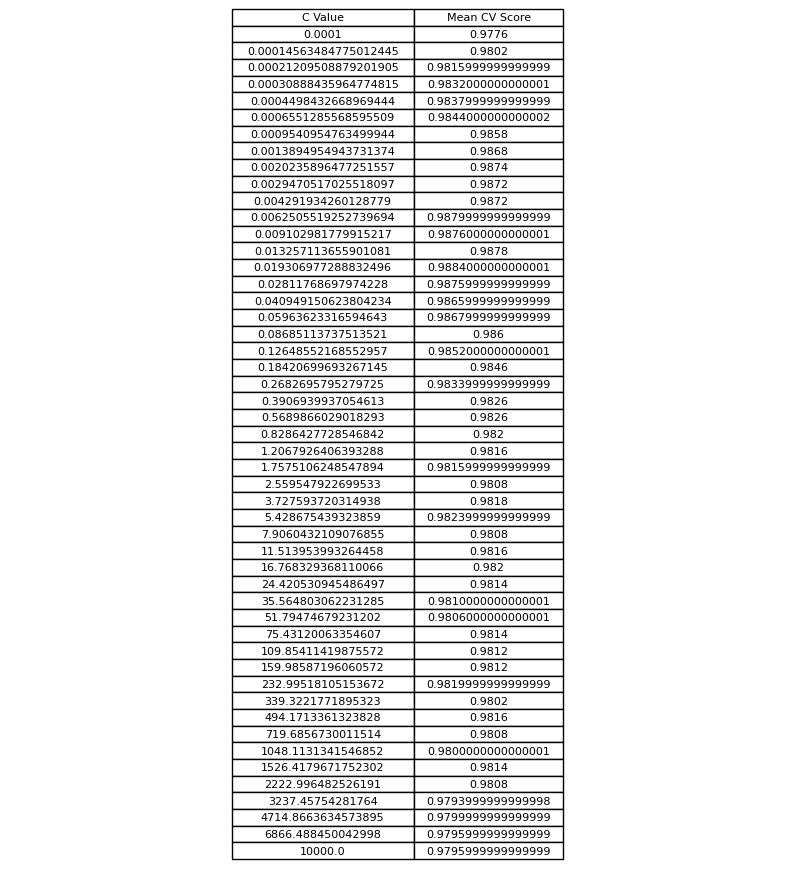

In [47]:
c_values = [
    0.0001, 0.00014563484775012445, 0.00021209508879201905, 0.00030888435964774815,
    0.0004498432668969444, 0.0006551285568595509, 0.0009540954763499944, 0.0013894954943731374,
    0.0020235896477251557, 0.0029470517025518097, 0.004291934260128779, 0.0062505519252739694,
    0.009102981779915217, 0.013257113655901081, 0.019306977288832496, 0.02811768697974228,
    0.040949150623804234, 0.05963623316594643, 0.08685113737513521, 0.12648552168552957,
    0.18420699693267145, 0.2682695795279725, 0.3906939937054613, 0.5689866029018293,
    0.8286427728546842, 1.2067926406393288, 1.7575106248547894, 2.559547922699533,
    3.727593720314938, 5.428675439323859, 7.9060432109076855, 11.513953993264458,
    16.768329368110066, 24.420530945486497, 35.564803062231285, 51.79474679231202,
    75.43120063354607, 109.85411419875572, 159.98587196060572, 232.99518105153672,
    339.3221771895323, 494.1713361323828, 719.6856730011514, 1048.1131341546852,
    1526.4179671752302, 2222.996482526191, 3237.45754281764, 4714.8663634573895,
    6866.488450042998, 10000.0
]
mean_cv_scores = [
    0.9776, 0.9802, 0.9815999999999999, 0.9832000000000001, 0.9837999999999999,
    0.9844000000000002, 0.9858, 0.9868, 0.9874, 0.9872, 0.9872, 0.9879999999999999,
    0.9876000000000001, 0.9878, 0.9884000000000001, 0.9875999999999999, 0.9865999999999999,
    0.9867999999999999, 0.986, 0.9852000000000001, 0.9846, 0.9833999999999999, 0.9826,
    0.9826, 0.982, 0.9816, 0.9815999999999999, 0.9808, 0.9818, 0.9823999999999999,
    0.9808, 0.9816, 0.982, 0.9814, 0.9810000000000001, 0.9806000000000001, 0.9814,
    0.9812, 0.9812, 0.9819999999999999, 0.9802, 0.9816, 0.9808, 0.9800000000000001,
    0.9814, 0.9808, 0.9793999999999998, 0.9799999999999999, 0.9795999999999999, 0.9795999999999999
]

df = pd.DataFrame({
    'C Value': c_values,
    'Mean CV Score': mean_cv_scores
})

# Plot the DataFrame as a table
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# Improve the visual layout of the table
table.auto_set_font_size(False)
table.set_fontsize(8)  # Adjust the font size as needed
table.auto_set_column_width(col=list(range(len(df.columns))))

plt.show()

In [38]:
##### Training on the whole training set once we identified the best C #####

# Training the model on the entire training set with the best C
final_model = LogisticRegression(penalty='l1', C=best_C, solver='liblinear', random_state=42, multi_class='ovr')
final_model.fit(X_train, y_train)

LogisticRegression(C=0.0062505519252739694, multi_class='ovr', penalty='l1',
                   random_state=42, solver='liblinear')

Accuracy on the test set: 0.8998648648648648


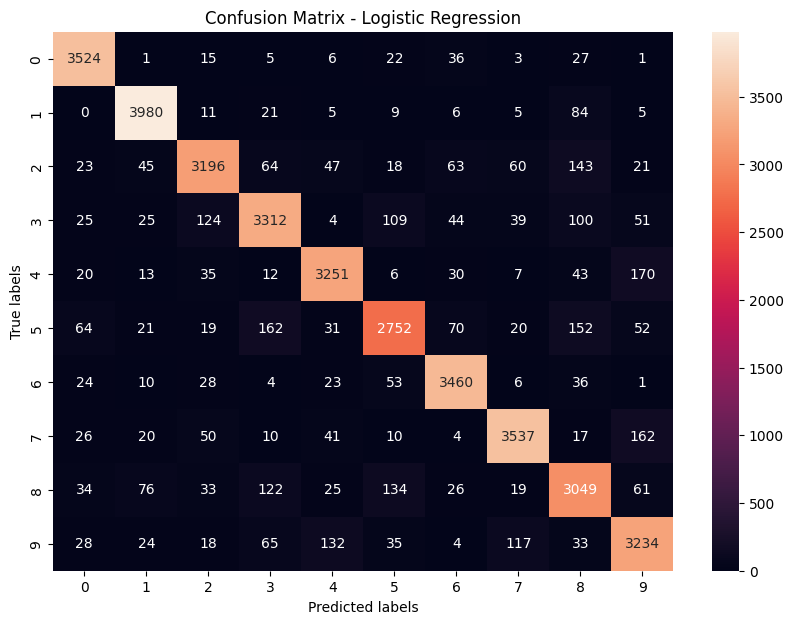

In [42]:
##### Training on the test set to evaluate the model #####

# Assuming final_model is already trained on the entire training set with the best C

# Predicting the labels of the test set
y_pred_test = final_model.predict(X_test)

# Calculating the accuracy of the predictions
test_accuracy = accuracy_score(y_test, y_pred_test)

# Printing the accuracy
print("Accuracy on the test set:", test_accuracy)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [41]:
# Generate a classification report
classification_rep = classification_report(y_test, y_pred_test)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      3640
           1       0.94      0.96      0.95      4126
           2       0.91      0.87      0.89      3680
           3       0.88      0.86      0.87      3833
           4       0.91      0.91      0.91      3587
           5       0.87      0.82      0.85      3343
           6       0.92      0.95      0.94      3645
           7       0.93      0.91      0.92      3877
           8       0.83      0.85      0.84      3579
           9       0.86      0.88      0.87      3690

    accuracy                           0.90     37000
   macro avg       0.90      0.90      0.90     37000
weighted avg       0.90      0.90      0.90     37000



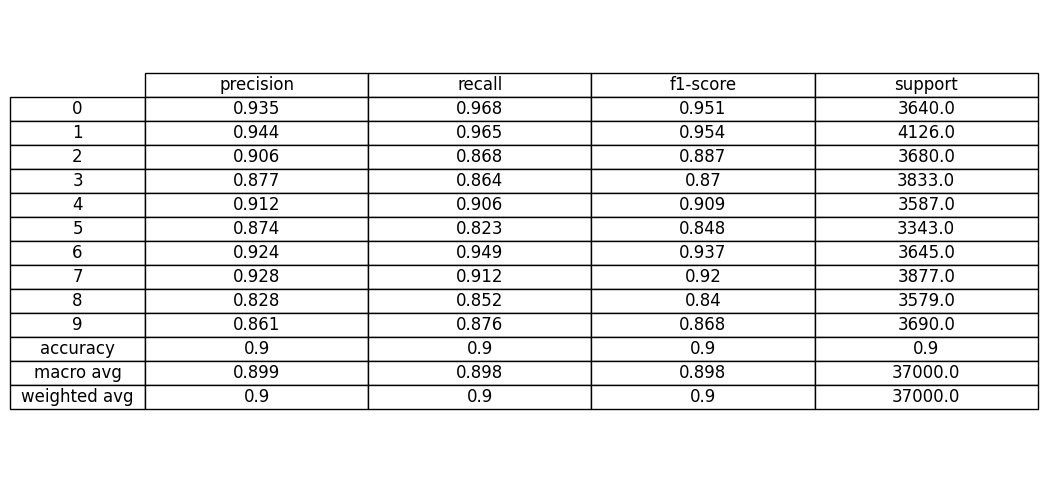

In [49]:
# Generate classification report
report = classification_report(y_test, y_pred_test, output_dict=True)

# Convert the report to a DataFrame
report_df = pd.DataFrame(report).transpose().round(3)

# Plot the DataFrame as a styled table
fig, ax = plt.subplots(figsize=(10, 6))  # Size for visibility, adjust as necessary
ax.axis('off')  # Hide the axis

# Create a table and use the DataFrame values
the_table = plt.table(cellText=report_df.values,
                      colWidths=[0.2]*len(report_df.columns),
                      rowLabels=report_df.index,
                      colLabels=report_df.columns,
                      cellLoc='center', rowLoc='center',
                      loc='center')

the_table.scale(1.2, 1.2)

# Adjust the table style
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)  # Adjust as appropriate
the_table.scale(1.2, 1.2)  # May need to adjust scaling to fit your particular display

# Display the table
plt.show()